## 1. Representación del espectrograma gamma obtenido y detección automática de picos.

In [2]:
import pandas as pd # Librería para trabjar con los archivos csv
import plotly.graph_objects as go # Esta librería nos permite generar gráficos interactivos, lo que hará que podamos seleccionar mejor las zonas donde existen los picos para poder compararlas entre sí
from scipy.signal import find_peaks # Esta librería es la que nos da los picos del csv con determinadas condiciones.
from plotly.subplots import make_subplots

# Cargamos los archivos CSV que obtuvimos del espectrometro gamma
# Necesitamos el enconding ya que el archivo no le lee como UTF-8 que es el que está por defecto en el comando
# Muestras

muestra_uib = pd.read_csv(r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\G1_Zumo_Limon_UIB.csv", encoding='ISO-8859-1') 
muestra_comercial = pd.read_csv(r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\G1_Zumo_Limon.csv", encoding='ISO-8859-1')

# Blancos

blanco_comercial = pd.read_csv(r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\G1_Blanco Limon.csv", encoding='ISO-8859-1')
blanco_uib = pd.read_csv(r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\G1_Blanco-limon-uib.csv", encoding='ISO-8859-1')

# Accedemos a las columnas 'Energía (keV)' y 'Cuentas' para representarlas.

energia_mcom = muestra_comercial['Energía (keV)']
cuentas_mcom = muestra_comercial['Cuentas']
energia_muib = muestra_uib['Energía (keV)']
cuentas_muib = muestra_uib['Cuentas']

energia_bcom = blanco_comercial['Energía (keV)']
cuentas_bcom = blanco_comercial['Cuentas']
energia_buib = blanco_uib['Energía (keV)']
cuentas_buib = blanco_uib['Cuentas']

# Ahora haremos la resta automática (esta no sustituye a la manual pero nos da una idea de cómo se verán las cosas)

cuentas_sfcom = cuentas_mcom - cuentas_bcom
cuentas_sfuib = cuentas_muib - cuentas_buib

# Ahora con estas cuentas sin fondo podremos detectar de manera automática dónde se encuentran los picos y facilitar su identificación

# Creamos la función que detecta los picos gracias a la función ya creada de la librería scypy
def detectar_picos(cuentas_sin_fondo, altura_minima=50, distancia_minima=10):
    picos, propiedades = find_peaks(cuentas_sin_fondo, height=altura_minima, distance=distancia_minima)
    valores_picos = propiedades['peak_heights'] # Nos da la altura del pico, dentro de propiedades hay más datos sobre el pico pero nos interesa sólo este.
    return picos, valores_picos

# Detectamos los picos solo en muestras sin fondo con altura > 50, ya que son las que nos aportarán información relevante ya que no detecta bien los picos del espectrograma debido a su forma.
picos_normal, valores_picos_normal = detectar_picos(cuentas_sfcom)
picos_universidad, valores_picos_universidad = detectar_picos(cuentas_sfuib)

# Crearemos ahora 4 gráficas que nos facilitarán el trabajo

# === FIGURA 1: Comercial ===
fig1 = go.Figure()

# Trazas principales
fig1.add_trace(go.Scatter(x=energia_bcom, y=cuentas_bcom, mode='lines',
                          name='Blanco Limón Comercial', line=dict(color='black', dash='dash')))
fig1.add_trace(go.Scatter(x=energia_mcom, y=cuentas_mcom, mode='lines',
                          name='Muestra Limón Comercial', line=dict(color='green')))

# Inset 1
fig1.add_trace(go.Scatter(x=energia_bcom, y=cuentas_bcom, mode='lines',
                          line=dict(color='black', dash='dash'), showlegend=False,
                          xaxis='x2', yaxis='y2'))
fig1.add_trace(go.Scatter(x=energia_mcom, y=cuentas_mcom, mode='lines',
                          line=dict(color='green'), showlegend=False,
                          xaxis='x2', yaxis='y2'))

# Inset 2
fig1.add_trace(go.Scatter(x=energia_bcom, y=cuentas_bcom, mode='lines',
                          line=dict(color='black', dash='dash'), showlegend=False,
                          xaxis='x3', yaxis='y3'))
fig1.add_trace(go.Scatter(x=energia_mcom, y=cuentas_mcom, mode='lines',
                          line=dict(color='green'), showlegend=False,
                          xaxis='x3', yaxis='y3'))

# Layout
fig1.update_layout(
    title="Espectrograma de la muestra de limón universidad + muestra del blanco de limón universidad",
    xaxis=dict(title="Energía (keV)"),
    yaxis=dict(title="Cuentas", range=[0, 850]),
    template="plotly_white",
    legend=dict(x=0.75, y=0.95, bgcolor="rgba(255,255,255,0.7)", bordercolor="black", borderwidth=1),

    # Inset positions
    xaxis2=dict(domain=[0.15, 0.45], anchor='y2', range=[0, 200], showgrid=False),
    yaxis2=dict(domain=[0.68, 0.97], anchor='x2', range=[0, 850], showgrid=False),

    xaxis3=dict(domain=[0.55, 0.85], anchor='y3', range=[1457, 1466], showgrid=False),
    yaxis3=dict(domain=[0.38, 0.67], anchor='x3', range=[0, 250], showgrid=False),

    shapes=[
        # Marco zona principal 0–200
        dict(type="rect", xref="x", yref="y", x0=0, x1=200, y0=0, y1=850,
             line=dict(color="red", width=2, dash="dot")),
        # Marco del inset correspondiente
        dict(type="rect", xref="x2 domain", yref="y2 domain", x0=0, x1=1, y0=0, y1=1,
             line=dict(color="red", width=2)),

        # Marco zona principal 1457–1486
        dict(type="rect", xref="x", yref="y", x0=1457, x1=1466, y0=0, y1=250,
             line=dict(color="blue", width=2, dash="dot")),
        # Marco del inset correspondiente
        dict(type="rect", xref="x3 domain", yref="y3 domain", x0=0, x1=1, y0=0, y1=1,
             line=dict(color="blue", width=2)),
    ]
)

# === FIGURA 2: Universidad ===
fig2 = go.Figure()

# Trazas principales
fig2.add_trace(go.Scatter(x=energia_buib, y=cuentas_buib, mode='lines',
                          name='Blanco Limón Universidad', line=dict(color='black', dash='dash')))
fig2.add_trace(go.Scatter(x=energia_muib, y=cuentas_muib, mode='lines',
                          name='Muestra Limón Universidad', line=dict(color='blue')))

# Inset 1
fig2.add_trace(go.Scatter(x=energia_buib, y=cuentas_buib, mode='lines',
                          line=dict(color='black', dash='dash'), showlegend=False,
                          xaxis='x2', yaxis='y2'))
fig2.add_trace(go.Scatter(x=energia_muib, y=cuentas_muib, mode='lines',
                          line=dict(color='blue'), showlegend=False,
                          xaxis='x2', yaxis='y2'))

# Inset 2
fig2.add_trace(go.Scatter(x=energia_buib, y=cuentas_buib, mode='lines',
                          line=dict(color='black', dash='dash'), showlegend=False,
                          xaxis='x3', yaxis='y3'))
fig2.add_trace(go.Scatter(x=energia_muib, y=cuentas_muib, mode='lines',
                          line=dict(color='blue'), showlegend=False,
                          xaxis='x3', yaxis='y3'))

# Layout
fig2.update_layout(
    title="Espectrograma de la muestra de limón comercial + muestra del blanco de limón comercial",
    xaxis=dict(title="Energía (keV)"),
    yaxis=dict(title="Cuentas", range=[0, 1200]),
    template="plotly_white",
    legend=dict(x=0.75, y=0.95, bgcolor="rgba(255,255,255,0.7)", bordercolor="black", borderwidth=1),

    # Inset positions (más arriba)
    xaxis2=dict(domain=[0.15, 0.45], anchor='y2', range=[0, 200], showgrid=False),
    yaxis2=dict(domain=[0.72, 1.0], anchor='x2', range=[0, 1200], showgrid=False),

    xaxis3=dict(domain=[0.55, 0.85], anchor='y3', range=[1457, 1466], showgrid=False),
    yaxis3=dict(domain=[0.43, 0.71], anchor='x3', range=[0, 250], showgrid=False),

    shapes=[
        # Marco zona principal 0–200
        dict(type="rect", xref="x", yref="y", x0=0, x1=200, y0=0, y1=1200,
             line=dict(color="red", width=2, dash="dot")),
        # Marco del inset correspondiente
        dict(type="rect", xref="x2 domain", yref="y2 domain", x0=0, x1=1, y0=0, y1=1,
             line=dict(color="red", width=2)),

        # Marco zona principal 1457–1486
        dict(type="rect", xref="x", yref="y", x0=1457, x1=1466, y0=0, y1=250,
             line=dict(color="blue", width=2, dash="dot")),
        # Marco del inset correspondiente
        dict(type="rect", xref="x3 domain", yref="y3 domain", x0=0, x1=1, y0=0, y1=1,
             line=dict(color="blue", width=2)),
    ]
)
# Gráfica 3: Muestra sin fondo UIB con picos
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=energia_muib, y=cuentas_sfuib, mode='lines', name='Muestra Sin Fondo Universidad', line=dict(color='darkblue')))
fig3.add_trace(go.Scatter(x=energia_muib[picos_universidad], y=valores_picos_universidad, mode='markers', name='Picos (>50)', marker=dict(color='red', symbol='x', size=10)))
fig3.update_layout(title="Muestra Sin Fondo Universidad", xaxis_title="Energía (keV)", yaxis_title="Cuentas", template="plotly_dark", showlegend=True)

# Gráfica 4: Muestra sin fondo comercial con picos
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=energia_mcom, y=cuentas_sfcom, mode='lines', name='Muestra Sin Fondo Normal', line=dict(color='darkgreen')))
fig4.add_trace(go.Scatter(x=energia_mcom[picos_normal], y=valores_picos_normal, mode='markers', name='Picos (>50)', marker=dict(color='red', symbol='x', size=10)))
fig4.update_layout(title="Muestra Sin Fondo Normal", xaxis_title="Energía (keV)", yaxis_title="Cuentas", template="plotly_dark", showlegend=True)

# Mostramos las gráficas + la información relevante de los picos

fig1.show()
fig2.show()

fig3.show()

print("Picos en la muestra sin fondo comercial (cuentas > 50):")
for energia, cuentas in zip(energia_mcom[picos_normal], valores_picos_normal):
    print(f"Energía (keV): {energia}, Cuentas: {cuentas:.0f}")

fig4.show()



print("Picos en la muestra sin fondo UIB (cuentas > 50):")
for energia, cuentas in zip(energia_muib[picos_universidad], valores_picos_universidad):
    print(f"Energía (keV): {energia}, Cuentas: {cuentas:.0f}")

Picos en la muestra sin fondo comercial (cuentas > 50):
Energía (keV): 36.63, Cuentas: 68
Energía (keV): 59.81, Cuentas: 59
Energía (keV): 69.95, Cuentas: 62
Energía (keV): 76.23, Cuentas: 60
Energía (keV): 91.69, Cuentas: 77
Energía (keV): 96.52, Cuentas: 63
Energía (keV): 129.85, Cuentas: 87
Energía (keV): 139.02, Cuentas: 65
Energía (keV): 1461.52, Cuentas: 200


Picos en la muestra sin fondo UIB (cuentas > 50):
Energía (keV): 31.29, Cuentas: 57
Energía (keV): 63.09, Cuentas: 105
Energía (keV): 73.21, Cuentas: 56
Energía (keV): 83.81, Cuentas: 58
Energía (keV): 95.86, Cuentas: 60
Energía (keV): 100.68, Cuentas: 61
Energía (keV): 110.32, Cuentas: 58
Energía (keV): 118.99, Cuentas: 61
Energía (keV): 133.93, Cuentas: 54
Energía (keV): 141.16, Cuentas: 52
Energía (keV): 168.15, Cuentas: 55
Energía (keV): 185.49, Cuentas: 63
Energía (keV): 1461.08, Cuentas: 194


## 2. Cálculo de la eficiencia

Zumo Comercial procesado: C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\zumo_comercial_modificado.csv


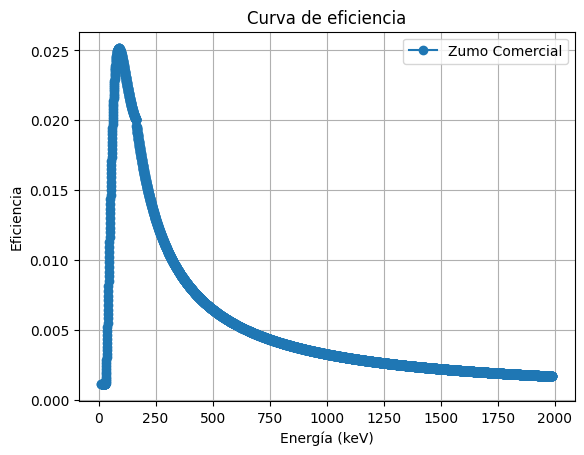

Zumo UIB procesado: C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\zumo_uib_modificado.csv


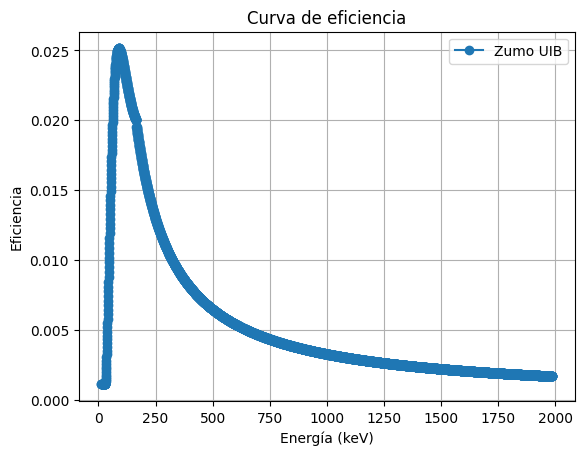

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculo_eficiencia(E, coef_bajas, coef_altas, transicion_keV, E_min=30):
    E = np.array(E, dtype=float)
    E = np.clip(E, E_min, None)  # Evita log(energías < 30 keV)
    lnE = np.log(E)
    eficiencia = np.zeros_like(E)

    for i in range(len(E)):
        coef = coef_bajas if E[i] < transicion_keV else coef_altas
        f = sum(c * lnE[i]**j for j, c in enumerate(coef))
        eficiencia[i] = np.exp(f)

    return eficiencia

def procesar_archivo_con_eficiencia(nombre, archivo_entrada, archivo_salida, coef_bajas, coef_altas, transicion_keV):
    # Cargamos y nombramos las columnas del csv
    df = pd.read_csv(archivo_entrada, skiprows=1, encoding='utf-8', header=None)
    df.columns = ["Canal", "Energía (keV)", "Cuentas"]

    energia = pd.to_numeric(df["Energía (keV)"], errors='coerce').fillna(1)
    eficiencia = calculo_eficiencia(energia, coef_bajas, coef_altas, transicion_keV)

    df["Eficiencia"] = eficiencia
    df.to_csv(archivo_salida, index=False)  # Escribimos con encabezado

    print(f"{nombre} procesado: {archivo_salida}")

    # GRaficamos la curva de eficiencia 
    plt.plot(energia, eficiencia, 'o-', label=f'{nombre}')
    plt.xlabel('Energía (keV)')
    plt.ylabel('Eficiencia')
    plt.title(f'Curva de eficiencia')
    plt.grid(True)
    plt.legend()
    plt.show()

# Coeficientes (son iguales para ambos casos por los que obtendremos la misma gráfica, aunque haremos el programa 2 veces para que añada la columna de eficiencia en ambos archivos)
coef_bajas = [-1.408e2, 8.571e1, -1.777e1, 1.221]
coef_altas = [1.642, -1.161, 1.376e-2]
transicion_keV = 165.86

# Procesamos Zumo Comercial
procesar_archivo_con_eficiencia(
    nombre="Zumo Comercial",
    archivo_entrada=r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\G1_Zumo_Limon.csv",
    archivo_salida=r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\zumo_comercial_modificado.csv",
    coef_bajas=coef_bajas,
    coef_altas=coef_altas,
    transicion_keV=transicion_keV
)

# Procesamos Zumo UIB
procesar_archivo_con_eficiencia(
    nombre="Zumo UIB",
    archivo_entrada=r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\G1_Zumo_Limon_UIB.csv",
    archivo_salida=r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\zumo_uib_modificado.csv",
    coef_bajas=coef_bajas,
    coef_altas=coef_altas,
    transicion_keV=transicion_keV
)


## 3. Cálculo actividad

In [4]:
import math

def calcular_actividad_y_error(
    cuentas_muestra, cuentas_blanco, eficiencia, error_eficiencia,
    yielde, error_yield, tiempo, error_tiempo,
    masa, error_masa): #Llamamos yielde al yield para evitar que se confunda con el comando yield de python

    # 1. Cuentas netas
    cuentas_netas = cuentas_muestra - cuentas_blanco

    # 2. Error cuentas netas (corresponde a la raíz cuadrada, explicamos en la memoria, corresponde al error de la gaussiana)
    error_cuentas_netas = math.sqrt(cuentas_muestra + cuentas_blanco)

    # Evitar divisiones por cero en eficiencia, yielde, tiempo, masa
    if eficiencia == 0 or yielde == 0 or tiempo == 0 or masa == 0:
        raise ValueError("Eficiencia, rendimiento, tiempo y masa deben ser distintos de cero.")

    # 3. Actividad total (nos dará la actividad en Bq)
    actividad = cuentas_netas / (eficiencia * yielde * tiempo)

    # 4. Errores relativos (hacemos el cálculo de los errores relativos para el presupuesto de errores)
    rel_error_cuentas = error_cuentas_netas / cuentas_netas if cuentas_netas != 0 else 0
    rel_error_eficiencia = error_eficiencia / eficiencia
    rel_error_yield = error_yield / yielde
    rel_error_tiempo = error_tiempo / tiempo

    # 5. Error total en la actividad 
    rel_error_total = math.sqrt(
        rel_error_cuentas**2 +
        rel_error_eficiencia**2 +
        rel_error_yield**2 +
        rel_error_tiempo**2
    )
    error_actividad = actividad * rel_error_total

    # 6. Actividad específica (calculamos la cantidad de actividad por cantidad de masa en Bq/kg)
    actividad_kg = actividad / masa
    rel_error_masa = error_masa / masa
    rel_error_actividad_kg = math.sqrt(rel_error_total**2 + rel_error_masa**2)
    error_actividad_kg = actividad_kg * rel_error_actividad_kg

    # 7. Presupuesto de errores (solo en actividad específica ya que es el que nos interesa)
    componentes = {
        'cuentas': rel_error_cuentas**2,
        'eficiencia': rel_error_eficiencia**2,
        'rendimiento': rel_error_yield**2,
        'tiempo': rel_error_tiempo**2,
        'masa': rel_error_masa**2
    }

    suma_total = sum(componentes.values())
    presupuesto_errores = {k: (v / suma_total * 100 if suma_total != 0 else 0) for k, v in componentes.items()}

    return actividad, error_actividad, actividad_kg, error_actividad_kg, presupuesto_errores

#Para chequear que todo funcione (He hecho la prueba con el K-40)

cuentas_muestra = 938
cuentas_blanco = 118
eficiencia = 0.0022719169271875972
error_eficiencia = 0.00
yield_gamma = 0.1066
error_yield = 0.0013
tiempo = 86400 # segundos (1 dia)
error_tiempo = 1  # segundos

masa_muestra = 1.028  # en kg
error_masa = 0.005  
actividad, error_actividad, actividad_kg, error_actividad_kg, presupuesto = calcular_actividad_y_error(cuentas_muestra, cuentas_blanco,eficiencia, error_eficiencia, yield_gamma, error_yield,tiempo, error_tiempo, masa_muestra, error_masa)

print(f"Actividad total: {actividad:.2f} Bq ± {error_actividad:.2f} Bq") 
print(f"Actividad específica: {actividad_kg:.2f} Bq/kg ± {error_actividad_kg:.2f} Bq/kg")
print("Presupuesto de errores (%):")
for componente, contrib in presupuesto.items():
    print(f"  {componente:12s}: {contrib:.2f}%")

Actividad total: 39.19 Bq ± 1.62 Bq
Actividad específica: 38.12 Bq/kg ± 1.59 Bq/kg
Presupuesto de errores (%):
  cuentas     : 90.11%
  eficiencia  : 0.00%
  rendimiento : 8.53%
  tiempo      : 0.00%
  masa        : 1.36%


## 4. Cálculo del límite de detección

In [5]:
def calcular_limite_deteccion_y_error(n_fondo, eficiencia, error_eficiencia, yielde, error_yield, tiempo, error_tiempo):
    # LD en cuentas
    ld_cuentas = 2.71 + 4.65 * math.sqrt(n_fondo) # Usamos la fórmula de Currie

    # LD en Bq
    ld_bq = ld_cuentas / (eficiencia * yielde * tiempo)

    # Propagación de errores
    rel_error_eficiencia = error_eficiencia / eficiencia
    rel_error_yield = error_yield / yielde
    rel_error_tiempo = error_tiempo / tiempo

    rel_error_total = math.sqrt(
        rel_error_eficiencia**2 +
        rel_error_yield**2 +
        rel_error_tiempo**2
    )

    error_ld_bq = ld_bq * rel_error_total

    # Presupuesto de errores (contribución relativa al error total)
    presupuesto = {}
    if rel_error_total != 0:
        presupuesto["eficiencia"] = 100 * (rel_error_eficiencia**2 / rel_error_total**2)
        presupuesto["rendimiento"] = 100 * (rel_error_yield**2 / rel_error_total**2)
        presupuesto["tiempo"] = 100 * (rel_error_tiempo**2 / rel_error_total**2)
    else:
        presupuesto = {key: 0.0 for key in ["eficiencia", "rendimiento", "tiempo"]}

    return ld_bq, error_ld_bq, presupuesto

# Vamos a comprobar que funcione

n_fondo = 118 # Las cuentas del blanco
eficiencia = 0.0022719169271875972
error_eficiencia = 0.00
yield_gamma = 0.1066
error_yield = 0.0013
tiempo = 86400 # segundos (1 dia)
error_tiempo = 1  # segundos

ld_bq, error_ld_bq, presupuesto = calcular_limite_deteccion_y_error(
    n_fondo, eficiencia, error_eficiencia, yield_gamma, error_yield, tiempo, error_tiempo
)

print(f"Límite de detección: {ld_bq:.2f} Bq ± {error_ld_bq:.2f} Bq")
print("\nPresupuesto de errores del LD:")
for componente, porcentaje in presupuesto.items():
    print(f"  - {componente.capitalize():12s}: {porcentaje:6.2f}%")

Límite de detección: 2.54 Bq ± 0.03 Bq

Presupuesto de errores del LD:
  - Eficiencia  :   0.00%
  - Rendimiento : 100.00%
  - Tiempo      :   0.00%


## 5. Programa para hacer todos los cálculos de los picos 


In [6]:
def procesar_datos_actividad(df,
                              tiempo_segundos, error_tiempo,
                              masa_kg, error_masa,
                              error_eficiencia_relativa=0.05):

    # Verificar que hay al menos 6 columnas
    if df.shape[1] < 6:
        raise ValueError("El archivo debe tener al menos 6 columnas: Canal, Cuentas_muestra, Cuentas_blanco, Yield, Error_yield, Eficiencia")

    resultados = []

    for _, row in df.iterrows():
        canal = row[0]
        cuentas_muestra = row[1]
        cuentas_blanco = row[2]
        yielde = row[3]
        error_yield = row[4]
        eficiencia = row[5]
        error_eficiencia = eficiencia * error_eficiencia_relativa

        # Calcular actividad y presupuesto
        actividad, err_actividad, actividad_kg, err_actividad_kg, presupuesto_actividad = \
            calcular_actividad_y_error(
                cuentas_muestra, cuentas_blanco,
                eficiencia, error_eficiencia,
                yielde, error_yield,
                tiempo_segundos, error_tiempo,
                masa_kg, error_masa
            )

        # Calcular LD y presupuesto
        ld, err_ld, presupuesto_ld = calcular_limite_deteccion_y_error(
            cuentas_blanco,
            eficiencia, error_eficiencia,
            yielde, error_yield,
            tiempo_segundos, error_tiempo
        )

        # Añadir el canal y los resultados
        resultados.append([
            canal,
            actividad, err_actividad,
            actividad_kg, err_actividad_kg,
            presupuesto_actividad["cuentas"],
            presupuesto_actividad["eficiencia"],
            presupuesto_actividad["rendimiento"],
            presupuesto_actividad["tiempo"],
            presupuesto_actividad["masa"],
            ld, err_ld,
            presupuesto_ld["eficiencia"],
            presupuesto_ld["rendimiento"],
            presupuesto_ld["tiempo"]
])

    # Crear DataFrame final con el que mostraremos todos los resultados
    df_resultados = pd.DataFrame(resultados, columns=[
    "Canal",
    "Actividad_Bq", "Error_actividad_Bq",
    "Actividad_esp_Bq_kg", "Error_actividad_esp",
    "%Err_cuentas_actividad", "%Err_eficiencia_actividad",
    "%Err_rendimiento_actividad", "%Err_tiempo_actividad", "%Err_masa_actividad",
    "LD_Bq", "Error_LD_Bq",
    "%Err_eficiencia_LD", "%Err_rendimiento_LD", "%Err_tiempo_LD"
])

    return df_resultados

Y ejecutamos el programa:

In [7]:
# Leemos los datos del excel que hemos hecho manualmente con los datos de los picos necesarios
df_datos1 = pd.read_excel(r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\tfg_cuentas.xlsx", header=None)
df_datos2 = pd.read_excel(r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\tfg_cuentas_uib.xlsx", header=None)

# Procesamos los datos
df_resultado1 = procesar_datos_actividad(
    df_datos1,
    tiempo_segundos=86400,
    error_tiempo=1,
    masa_kg=0.9216,
    error_masa=0.00016,
    error_eficiencia_relativa=0.00
)

df_resultado2 = procesar_datos_actividad(
    df_datos2,
    tiempo_segundos=86400,
    error_tiempo=1,
    masa_kg=0.9108,
    error_masa=0.00016,
    error_eficiencia_relativa=0.00
)

# Redondeamos los resultados para mostrar
df_resultado1_redondeado = df_resultado1.round(4)
df_resultado2_redondeado = df_resultado2.round(4)

# Imprimimos la tabla para visualizar que todo este correcto en el df
print("\n=== Resultados Muestra Comercial ===")
print(df_resultado1_redondeado.to_string(index=False))

print("\n=== Resultados Muestra UIB ===")
print(df_resultado2_redondeado.to_string(index=False))


=== Resultados Muestra Comercial ===
 Canal  Actividad_Bq  Error_actividad_Bq  Actividad_esp_Bq_kg  Error_actividad_esp  %Err_cuentas_actividad  %Err_eficiencia_actividad  %Err_rendimiento_actividad  %Err_tiempo_actividad  %Err_masa_actividad  LD_Bq  Error_LD_Bq  %Err_eficiencia_LD  %Err_rendimiento_LD  %Err_tiempo_LD
  72.0        1.1450              1.4436               1.2424               1.5664                 99.9944                        0.0                      0.0056                    0.0               0.0000 4.7838       0.0450                 0.0              99.9998          0.0002
 106.0        2.0423              1.1656               2.2161               1.2648                 96.4119                        0.0                      3.5881                    0.0               0.0000 3.7595       0.4064                 0.0             100.0000          0.0000
 167.0        7.2360              1.7603               7.8516               1.9100                 85.1013       

Por último convertimos la tabla a latex para mostrar los resultados con mayor facilidad

In [8]:
# Convertimos el DataFrame a formato LaTeX (evitamos hacer la tabla manualmente para la memoria)
latex_code1 = df_resultado1.to_latex(index=False, float_format="%.3f")
latex_code2 = df_resultado2.to_latex(index=False, float_format="%.3f")

# Mostramos el código LaTeX
print(latex_code1)
print(latex_code2)


\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
   Canal &  Actividad\_Bq &  Error\_actividad\_Bq &  Actividad\_esp\_Bq\_kg &  Error\_actividad\_esp &  \%Err\_cuentas\_actividad &  \%Err\_eficiencia\_actividad &  \%Err\_rendimiento\_actividad &  \%Err\_tiempo\_actividad &  \%Err\_masa\_actividad &  LD\_Bq &  Error\_LD\_Bq &  \%Err\_eficiencia\_LD &  \%Err\_rendimiento\_LD &  \%Err\_tiempo\_LD \\
\midrule
  72.000 &         1.145 &               1.444 &                1.242 &                1.566 &                  99.994 &                      0.000 &                       0.006 &                  0.000 &                0.000 &  4.784 &        0.045 &               0.000 &              100.000 &           0.000 \\
 106.000 &         2.042 &               1.166 &                2.216 &                1.265 &                  96.412 &                      0.000 &                       3.588 &                  0.000 &                0.000 &  3.759 &        0.406 &               0.000 &         

C:\Users\kobej\AppData\Local\Temp\ipykernel_13772\4132803754.py:2: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.

C:\Users\kobej\AppData\Local\Temp\ipykernel_13772\4132803754.py:3: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



## PROGRAMAS A PARTE DEL CÁLCULO GAMMA

## Regresión lineal simple


Pendiente (m): 0.4830 ± 0.0001
Ordenada al origen (b): 11.4996 ± 0.1321
Coeficiente de correlación lineal (r): 1.000000


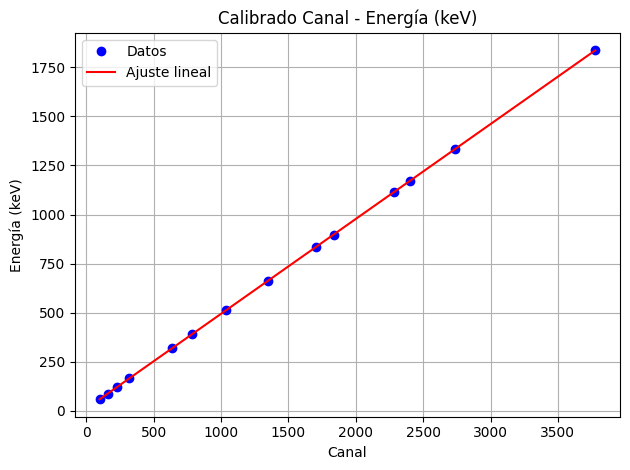


Código LaTeX para el ajuste con r:

$y = (0.483 \pm 0.000)x + (11.500 \pm 0.132),\quad r = 1.000$


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Modelo lineal
def modelo_lineal(x, m, b):
    return m * x + b

# Leemos los datos desde el archivo Excel 
ruta_excel = r"C:\Users\kobej\OneDrive\Documentos\TFG\TFG_github\ajuste recta.xlsx"  
df = pd.read_excel(ruta_excel, header=None)

# Extraemos las columnas
y = df.iloc[:, 0].to_numpy(dtype=float)
x = df.iloc[:, 1].to_numpy(dtype=float)

# Ajuste con curve_fit
parametros, covarianza = curve_fit(modelo_lineal, x, y)
pendiente, intercepto = parametros
error_pendiente, error_intercepto = np.sqrt(np.diag(covarianza))

# Ajuste con linregress para obtener el coeficiente de correlación
slope_lr, intercept_lr, r_value, p_value, std_err = linregress(x, y)

# Imprimir resultados
print(f"Pendiente (m): {pendiente:.4f} ± {error_pendiente:.4f}")
print(f"Ordenada al origen (b): {intercepto:.4f} ± {error_intercepto:.4f}")
print(f"Coeficiente de correlación lineal (r): {r_value:.6f}")

# Valores ajustados para la gráfica
x_fit = np.linspace(min(x), max(x), 100)
y_fit = modelo_lineal(x_fit, pendiente, intercepto)

# Graficamos
plt.plot(x, y, 'o', label='Datos', color='blue')
plt.plot(x_fit, y_fit, '-', label='Ajuste lineal', color='red')
plt.xlabel('Canal')
plt.ylabel('Energía (keV)')
plt.title('Calibrado Canal - Energía (keV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Código LaTeX
latex_code = (
    r"$y = ({:.3f} \pm {:.3f})x + ({:.3f} \pm {:.3f}),\quad r = {:.3f}$"
    .format(pendiente, error_pendiente, intercepto, error_intercepto, r_value)
)

print("\nCódigo LaTeX para el ajuste con r:\n")
print(latex_code)



## Cálculo beta

In [10]:
import numpy as np

def calcular_actividad_y_amd_con_presupuesto(
    cpm_beta, err_cpm_beta,
    cpmb_beta, err_cpmb_beta,
    cpm_alpha, err_cpm_alpha,
    cpmb_alpha, err_cpmb_alpha,
    gamma, err_gamma,
    E, err_E,
    F, err_F,
    V, err_V,
    t_m, t_b
):
    # Cálculo de términos comunes
    num = (cpm_beta - cpmb_beta) - gamma * (cpm_alpha - cpmb_alpha)
    den = 60 * E * F * V
    A = num / den

    # Términos individuales para el error cuadrático total
    err_terms = {
        'cpm_beta': err_cpm_beta**2,
        'cpmb_beta': err_cpmb_beta**2,
        'cpm_alpha': (gamma * err_cpm_alpha)**2,
        'cpmb_alpha': (gamma * err_cpmb_alpha)**2,
        'gamma': ((cpm_alpha - cpmb_alpha) * err_gamma)**2,
        'E': (num * err_E / E)**2,
        'F': (num * err_F / F)**2,
        'V': (num * err_V / V)**2
    }

    # Suma total de los términos cuadráticos
    suma_total = sum(err_terms.values())

    # Error combinado
    err_A = np.sqrt(suma_total) / den

    # Porcentaje de contribución de cada término
    presupuesto_errores = {
        var: (valor / suma_total) * 100 for var, valor in err_terms.items()
    }

    # Cálculo del AMD
    term1 = cpmb_beta * (1/t_m + 1/t_b)
    term2 = gamma**2 * (cpm_alpha - cpmb_alpha) / t_m
    term3 = 2.7 * (1/t_m + 1/t_b)
    amd_numerator = 3.29 * np.sqrt(term1 + term2 + term3)
    AMD = amd_numerator / den

    return A, err_A, AMD, presupuesto_errores


# Creamos una función de impresión común
def imprimir_resultados(nombre_muestra, A, err_A, AMD, presupuesto):
    print(f"\n{nombre_muestra}")
    print(f"Actividad = {A:.5f} ± {err_A:.5f} Bq/kg")
    print(f"AMD = {AMD:.5f} Bq/kg")
    print("Presupuesto de errores (%):")
    for k, v in presupuesto.items():
        print(f"  {k:12s}: {v:.2f}%")

# Cálculos para cada muestra, con las distintas maneras de calcular E y F

A, err_A, AMD, presupuesto = calcular_actividad_y_amd_con_presupuesto(
    cpm_beta=19.19, err_cpm_beta=0.71,
    cpmb_beta=0.81, err_cpmb_beta=0.03,
    cpm_alpha=0.073, err_cpm_alpha=0.01,
    cpmb_alpha=0.053, err_cpmb_alpha=0.007,
    gamma=0.26, err_gamma=0.0004,
    E=-0.1865, err_E=0.0001,
    F=-0.402541, err_F=0.0001, 
    V=0.0498, err_V=0.00008,
    t_m=1000, t_b=1000
)
imprimir_resultados("Muestra comercial (lineal)", A, err_A, AMD, presupuesto)

A, err_A, AMD, presupuesto = calcular_actividad_y_amd_con_presupuesto(
    cpm_beta=28.42, err_cpm_beta=1.05,
    cpmb_beta=0.81, err_cpmb_beta=0.03,
    cpm_alpha=0.075, err_cpm_alpha=0.01,
    cpmb_alpha=0.053, err_cpmb_alpha=0.007,
    gamma=0.26, err_gamma=0.0004,
    E=-0.505947, err_E=0.0001,
    F=-1.43699, err_F=0.0001,
    V=0.078, err_V=0.00008,
    t_m=1000, t_b=1000
)
imprimir_resultados("Muestra UIB (lineal)", A, err_A, AMD, presupuesto)

A, err_A, AMD, presupuesto = calcular_actividad_y_amd_con_presupuesto(
    cpm_beta=19.19, err_cpm_beta=0.71,
    cpmb_beta=0.81, err_cpmb_beta=0.03,
    cpm_alpha=0.073, err_cpm_alpha=0.01,
    cpmb_alpha=0.053, err_cpmb_alpha=0.007,
    gamma=0.26, err_gamma=0.0004,
    E=0.2103956, err_E=0.004,
    F=0.441216582, err_F=0.009, 
    V=0.0498, err_V=0.00008,
    t_m=1000, t_b=1000
)
imprimir_resultados("Muestra comercial (máxima calibrada)", A, err_A, AMD, presupuesto)

A, err_A, AMD, presupuesto = calcular_actividad_y_amd_con_presupuesto(
    cpm_beta=28.42, err_cpm_beta=1.05,
    cpmb_beta=0.81, err_cpmb_beta=0.03,
    cpm_alpha=0.075, err_cpm_alpha=0.01,
    cpmb_alpha=0.053, err_cpmb_alpha=0.007,
    gamma=0.26, err_gamma=0.0004,
    E=0.2103956, err_E=0.004,
    F=0.441216582, err_F=0.009,
    V=0.078, err_V=0.00008,
    t_m=1000, t_b=1000
)
imprimir_resultados("Muestra UIB (máxima calibrada)", A, err_A, AMD, presupuesto)

A, err_A, AMD, presupuesto = calcular_actividad_y_amd_con_presupuesto(
    cpm_beta=19.19, err_cpm_beta=0.71,
    cpmb_beta=0.81, err_cpmb_beta=0.03,
    cpm_alpha=0.073, err_cpm_alpha=0.01,
    cpmb_alpha=0.053, err_cpmb_alpha=0.007,
    gamma=0.26, err_gamma=0.0004,
    E=0.0636, err_E=0.007,
    F=0.13335285, err_F=0.014, 
    V=0.0498, err_V=0.00008,
    t_m=1000, t_b=1000
)
imprimir_resultados("Muestra comercial (exponencial)", A, err_A, AMD, presupuesto)

A, err_A, AMD, presupuesto = calcular_actividad_y_amd_con_presupuesto(
    cpm_beta=28.42, err_cpm_beta=1.05,
    cpmb_beta=0.81, err_cpmb_beta=0.03,
    cpm_alpha=0.075, err_cpm_alpha=0.01,
    cpmb_alpha=0.053, err_cpmb_alpha=0.007,
    gamma=0.26, err_gamma=0.0004,
    E=0.01386, err_E=0.0026,
    F=0.0290607, err_F=0.0054,
    V=0.078, err_V=0.00008,
    t_m=1000, t_b=1000
)
imprimir_resultados("Muestra UIB (exponencial)", A, err_A, AMD, presupuesto)


Muestra comercial (lineal)
Actividad = 81.91304 ± 3.17107 Bq/kg
AMD = 1.22896 Bq/kg
Presupuesto de errores (%):
  cpm_beta    : 99.62%
  cpmb_beta   : 0.18%
  cpm_alpha   : 0.00%
  cpmb_alpha  : 0.00%
  gamma       : 0.00%
  E           : 0.02%
  F           : 0.00%
  V           : 0.17%

Muestra UIB (lineal)
Actividad = 8.11282 ± 0.30884 Bq/kg
AMD = 0.08102 Bq/kg
Presupuesto de errores (%):
  cpm_beta    : 99.84%
  cpmb_beta   : 0.08%
  cpm_alpha   : 0.00%
  cpmb_alpha  : 0.00%
  gamma       : 0.00%
  E           : 0.00%
  F           : 0.00%
  V           : 0.07%

Muestra comercial (máxima calibrada)
Actividad = 66.24507 ± 3.16028 Bq/kg
AMD = 0.99389 Bq/kg
Presupuesto de errores (%):
  cpm_beta    : 65.60%
  cpmb_beta   : 0.12%
  cpm_alpha   : 0.00%
  cpmb_alpha  : 0.00%
  gamma       : 0.00%
  E           : 15.88%
  F           : 18.28%
  V           : 0.11%

Muestra UIB (máxima calibrada)
Actividad = 63.53925 ± 2.99824 Bq/kg
AMD = 0.63457 Bq/kg
Presupuesto de errores (%):
  cpm_be

## Ajuste exponencial de la curva de eficiencia

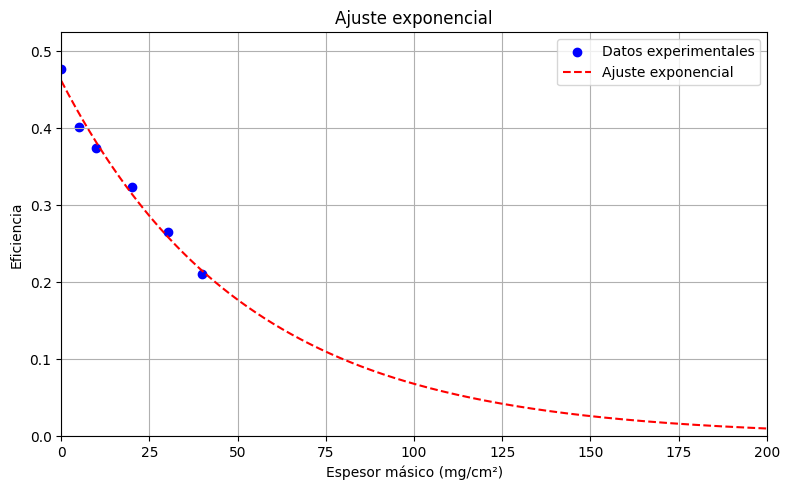

Coeficiente a = 0.461559 ± 0.010043
Coeficiente b = 0.019147 ± 0.001354

Coeficiente de correlación lineal (r) = -0.994110

Código LaTeX para el ajuste con r:

$y = (0.462 \pm 0.010) \cdot e^{-(0.019 \pm 0.001)x},\quad r = -0.994$


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Datos
x_data = np.array([0, 4.95, 9.905, 20.07, 30.135, 39.94])
y_data = np.array([0.476853339, 0.401218173, 0.374955908, 0.323044823, 0.265297633, 0.2103956])

# Modelo exponencial
def modelo_exponencial(x, a, b):
    return a * np.exp(-b * x)

# Ajuste
parametros, covarianza = curve_fit(modelo_exponencial, x_data, y_data)
a_ajustado, b_ajustado = parametros
error_a, error_b = np.sqrt(np.diag(covarianza))

# Curva ajustada
x_suave = np.linspace(0, 200, 1000)
y_ajuste = modelo_exponencial(x_suave, a_ajustado, b_ajustado)

# Gráfica
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Datos experimentales', color='blue')
plt.plot(x_suave, y_ajuste, 'r--', label='Ajuste exponencial')
plt.xlabel("Espesor másico (mg/cm²)")
plt.ylabel("Eficiencia")
plt.title("Ajuste exponencial")
plt.xlim(0, 200)
plt.ylim(0, max(y_data) * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir coeficientes y errores
print(f"Coeficiente a = {a_ajustado:.6f} ± {error_a:.6f}")
print(f"Coeficiente b = {b_ajustado:.6f} ± {error_b:.6f}")

# Cálculo del coeficiente de correlación
ln_y = np.log(y_data)
slope, intercept, r_value, p_value, std_err = linregress(x_data, ln_y)
print(f"\nCoeficiente de correlación lineal (r) = {r_value:.6f}")

# Código LaTeX
latex_code = (
    r"$y = ({:.3f} \pm {:.3f}) \cdot e^{{-({:.3f} \pm {:.3f})x}},\quad r = {:.3f}$"
    .format(a_ajustado, error_a, b_ajustado, error_b, r_value)
)

print("\nCódigo LaTeX para el ajuste con r:\n")
print(latex_code)



C:\Users\kobej\AppData\Local\Temp\ipykernel_13772\3250247555.py:11: RuntimeWarning:

overflow encountered in exp



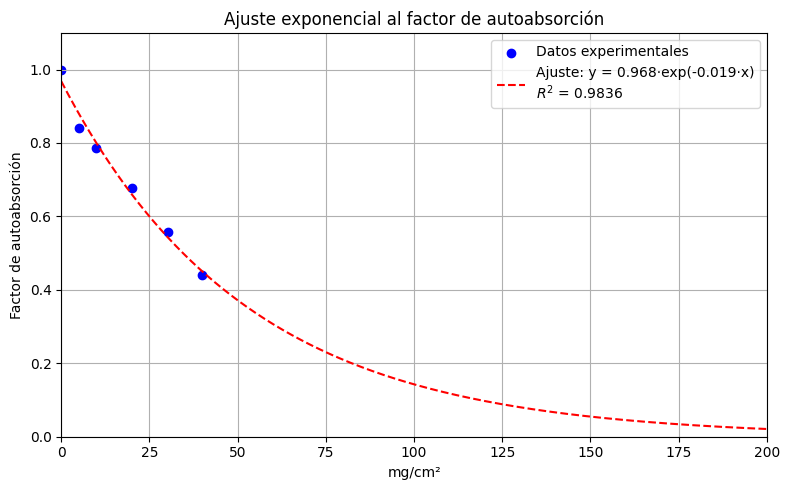

Coeficiente a = 0.967926 ± 0.021060
Coeficiente b = 0.019147 ± 0.001354
Coeficiente de determinación R² = 0.983586
Coeficiente de correlación r = 0.991759

Código LaTeX para el ajuste:

$y = (0.968 \pm 0.021) \cdot e^{-(0.019 \pm 0.001)x},\quad R^2 = 0.9836$


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de autoabsorción
x_data = np.array([0, 4.95, 9.905, 20.07, 30.135, 39.94])
y_data = np.array([1, 0.841386944, 0.78631285, 0.677451109, 0.556350582, 0.441216582])

# Modelo exponencial
def modelo_exponencial(x, a, b):
    return a * np.exp(-b * x)

# Ajuste
parametros, covarianza = curve_fit(modelo_exponencial, x_data, y_data)
a_ajustado, b_ajustado = parametros
error_a, error_b = np.sqrt(np.diag(covarianza))

# Predicciones del modelo ajustado
y_pred = modelo_exponencial(x_data, a_ajustado, b_ajustado)

# Calcular R²
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)  # Como la correlación es positiva en este caso

# Curva ajustada para graficar
x_suave = np.linspace(0, 200, 1000)
y_ajuste = modelo_exponencial(x_suave, a_ajustado, b_ajustado)

# Gráfica
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Datos experimentales', color='blue')
plt.plot(x_suave, y_ajuste, 'r--',
         label=f"Ajuste: y = {a_ajustado:.3f}·exp(-{b_ajustado:.3f}·x)\n$R^2$ = {r_squared:.4f}")
plt.xlabel("mg/cm²")
plt.ylabel("Factor de autoabsorción")
plt.title("Ajuste exponencial al factor de autoabsorción")
plt.xlim(0, 200)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Coeficientes y errores
print(f"Coeficiente a = {a_ajustado:.6f} ± {error_a:.6f}")
print(f"Coeficiente b = {b_ajustado:.6f} ± {error_b:.6f}")
print(f"Coeficiente de determinación R² = {r_squared:.6f}")
print(f"Coeficiente de correlación r = {r:.6f}")

# Código LaTeX
latex_code = (
    r"$y = ({:.3f} \pm {:.3f}) \cdot e^{{-({:.3f} \pm {:.3f})x}},\quad R^2 = {:.4f}$"
    .format(a_ajustado, error_a, b_ajustado, error_b, r_squared)
)

print("\nCódigo LaTeX para el ajuste:\n")
print(latex_code)
